<a href="https://colab.research.google.com/github/ShraddhaSharma24/Machine-learning/blob/main/Netflix_stock_price_prediction_using_ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
jainilcoder_netflix_stock_price_prediction_path = kagglehub.dataset_download('jainilcoder/netflix-stock-price-prediction')

print('Data source import complete.')


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/netflix-stock-price-prediction/NFLX.csv


In [ ]:
# Install necessary libraries
# pip install pandas numpy statsmodels matplotlib

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [ ]:
df=pd.read_csv('/kaggle/input/netflix-stock-price-prediction/NFLX.csv')

In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [ ]:
df1=df[['Date','Adj Close']]

In [ ]:
df1.head()

,Date,Adj Close
0,2018-02-05,254.259995
1,2018-02-06,265.720001
2,2018-02-07,264.559998
3,2018-02-08,250.100006
4,2018-02-09,249.470001


In [ ]:
df1.shape

(1009, 2)

In [ ]:
df1.isnull().sum()

Date         0
Adj Close    0
dtype: int64

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1009 non-null   object 
 1   Adj Close  1009 non-null   float64
dtypes: float64(1), object(1)
memory usage: 15.9+ KB


## Train test split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X=df1['Date']
y=df1['Adj Close']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [ ]:
# Fit the ARIMA model
p, d, q = 1, 1, 1  # ARIMA parameters (adjust as needed)
model = ARIMA(y_train, order=(p, d, q))
fitted_model = model.fit()

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [ ]:
# Summary of the model
print(fitted_model.summary())

                               SARIMAX Results                                
Dep. Variable:              Adj Close   No. Observations:                  807
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -4909.429
Date:                Sun, 01 Dec 2024   AIC                           9824.858
Time:                        15:37:52   BIC                           9838.934
Sample:                             0   HQIC                          9830.264
                                - 807                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0316      0.036      0.872      0.383      -0.039       0.103
ma.L1         -0.9999      0.260     -3.844      0.000      -1.510      -0.490
sigma2      1.134e+04   3165.681      3.584      0.0

In [ ]:
# Forecast
forecast_steps = len(y_test)
forecast = fitted_model.forecast(steps=forecast_steps)
forecast_index = y_test.index

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


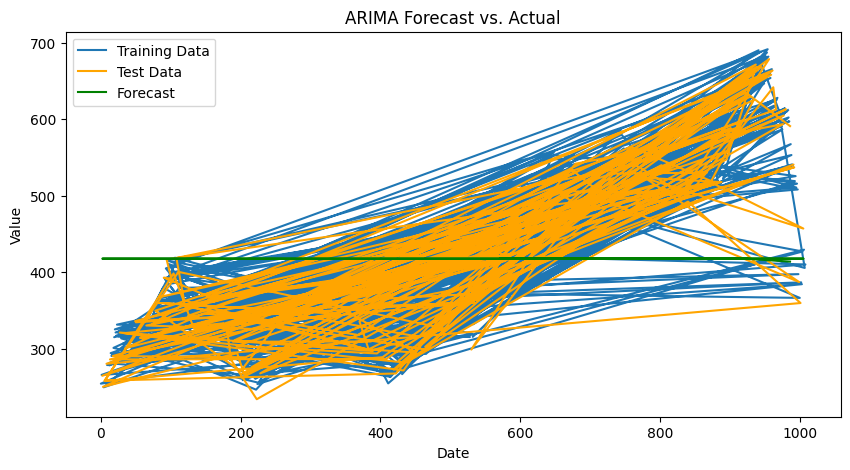

In [ ]:
# Plot the forecast vs. actual data
plt.figure(figsize=(10, 5))
plt.plot(y_train, label='Training Data')
plt.plot(y_test, label='Test Data', color='orange')
plt.plot(forecast_index, forecast, label='Forecast', color='green')
plt.title("ARIMA Forecast vs. Actual")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.show()

In [ ]:
# Evaluate the model
mse = mean_squared_error(y_test, forecast)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 13231.012983731081


## second model

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from scipy.stats import norm, skew #for some statistics
from scipy import stats #qqplot
import statsmodels.api as sm #for decomposing the trends, seasonality etc.

from statsmodels.tsa.statespace.sarimax import SARIMAX

/tmp/ipykernel_30/2269912574.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Adj Close'], fit=norm)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


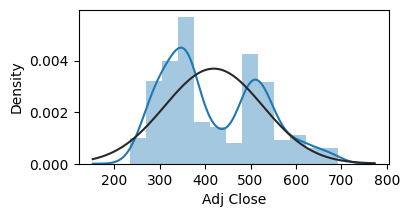

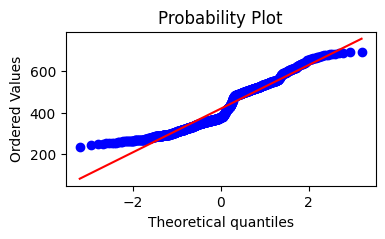

In [ ]:
from matplotlib import rcParams
# figure size in inches
rcParams['figure.figsize'] = 4,2

sns.distplot(df['Adj Close'], fit=norm)

#Get the QQ-plot
fig = plt.figure()
res = stats.probplot(df['Adj Close'], plot=plt)
plt.show()

In [ ]:
df = df.groupby('Date')['Adj Close'].sum().reset_index()

In [ ]:
df.Date=pd.to_datetime(df.Date)
df

,Date,Adj Close
0,2018-02-05,254.259995
1,2018-02-06,265.720001
2,2018-02-07,264.559998
3,2018-02-08,250.100006
4,2018-02-09,249.470001
...,...,...
1004,2022-01-31,427.140015
1005,2022-02-01,457.130005
1006,2022-02-02,429.480011
1007,2022-02-03,405.600006


In [ ]:
df.set_index(['Date'],inplace=True)
df.head()

,Adj Close
Date,
2018-02-05,254.259995
2018-02-06,265.720001
2018-02-07,264.559998
2018-02-08,250.100006
2018-02-09,249.470001


## Plotting dataset:

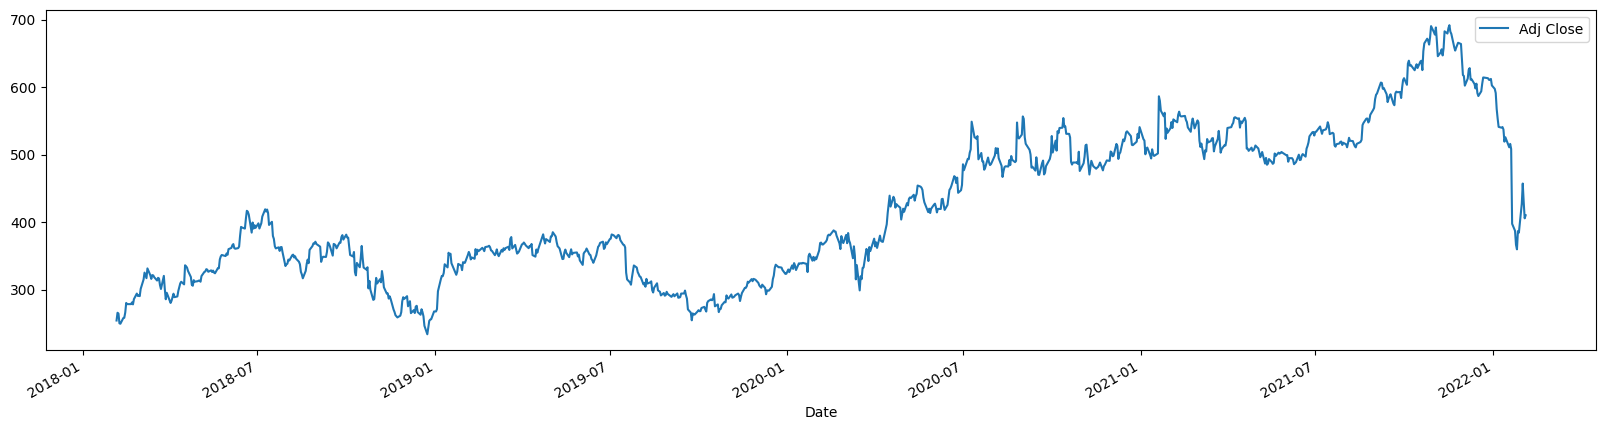

In [ ]:
df.plot(figsize=(20,5))
plt.show()

## Checking for stationarity using Augmented Dickey Fuller Test:

In [ ]:
from statsmodels.tsa.stattools import adfuller

def adfuller_test(trends):
    result = adfuller(trends)
    labels = ['ADF Test Statistic','p-value','#Lags Used','#Observation Used']
    for value,label in zip(result,labels):
        print(label  + ': ' + str(value))
    if result[1]<=0.05:
        print('Strong evidence against the null hypothesis, Hence REJECT Ho. and The series is Stationary')
    else:
        print('week evidence against null hypothesis, Hence ACCEPT Ho. that the series is not stationary.')

adfuller_test(df['Adj Close'])

ADF Test Statistic: -1.8125906878289955
p-value: 0.3742289256820759
#Lags Used: 6
#Observation Used: 1002
week evidence against null hypothesis, Hence ACCEPT Ho. that the series is not stationary.


ADF Test Statistic: -14.24227599292912
p-value: 1.5304022754298515e-26
#Lags Used: 5
#Observation Used: 1002
Strong evidence against the null hypothesis, Hence REJECT Ho. and The series is Stationary


<Axes: xlabel='Date'>

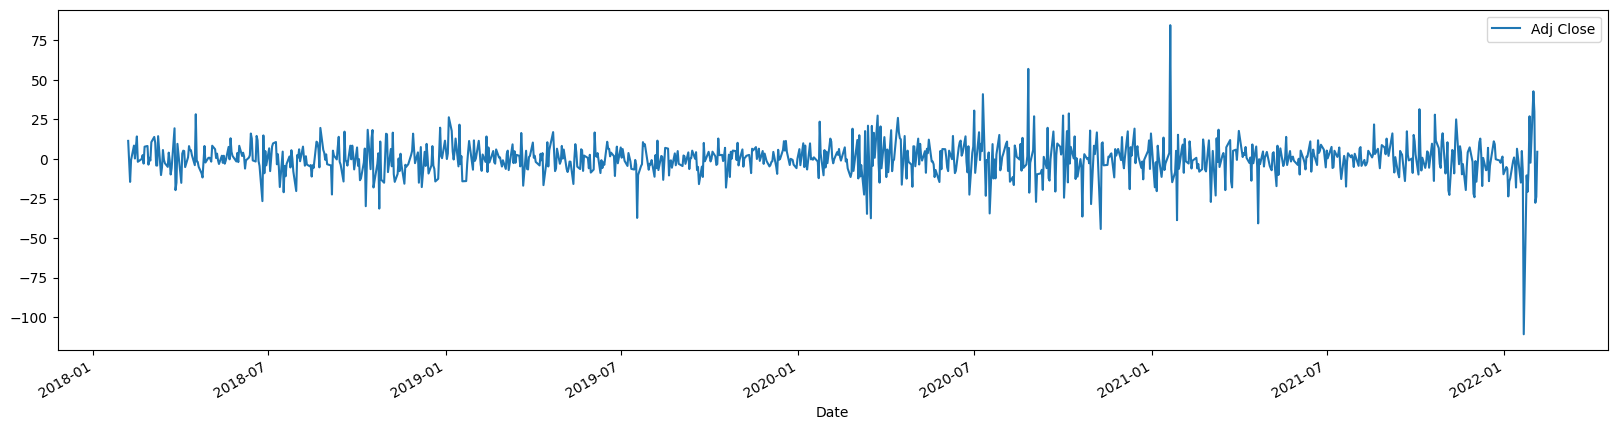

In [ ]:
diff1=df-df.shift(1)
diff1=diff1.dropna()
adfuller_test(diff1)
diff1.plot(figsize=(20,5))

In [ ]:

import statsmodels.graphics.tsaplots as sgt
from statsmodels.graphics.tsaplots import plot_pacf

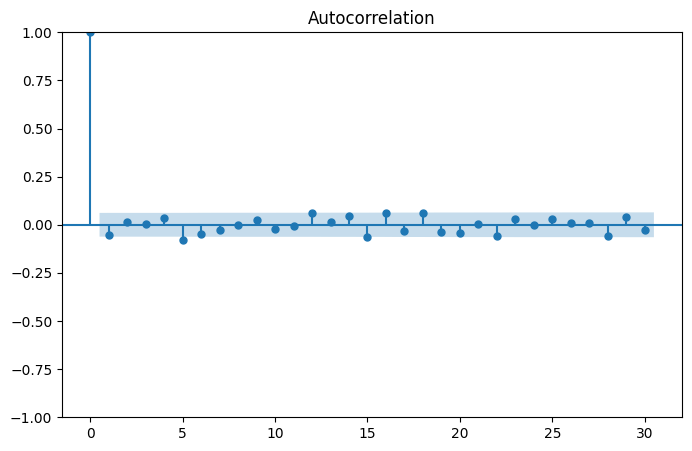

In [ ]:
fig, ax = plt.subplots(figsize=(8, 5))
sgt.plot_acf(diff1['Adj Close'], ax=ax, lags=30)
plt.show()

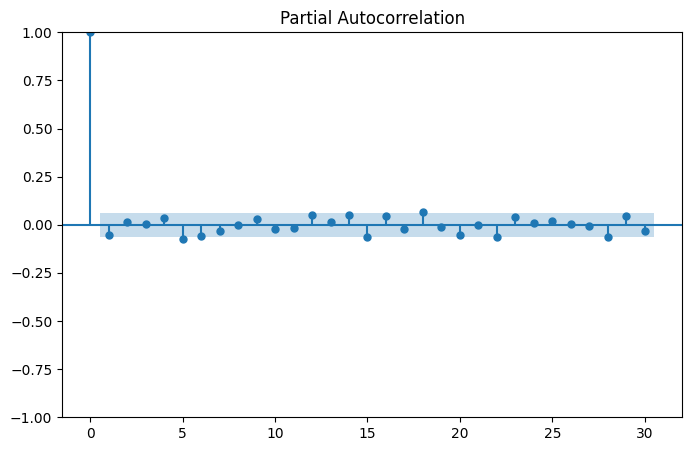

In [ ]:
fig, ax = plt.subplots(figsize=(8, 5))
sgt.plot_pacf(diff1['Adj Close'], ax=ax, lags=30)
plt.show()

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings("ignore")
for i in range(1,7):
    for j in range(1,7):
        model=ARIMA(df['Adj Close'],order=(i,0,j))
        result=model.fit()
        print(f"AIC :{result.aic}, Order Of AR: {i}, Order of MA:{j} ")

AIC :7719.252725378626, Order Of AR: 1, Order of MA:1 
AIC :7720.890983924168, Order Of AR: 1, Order of MA:2 
AIC :7722.748629701169, Order Of AR: 1, Order of MA:3 
AIC :7723.68576188463, Order Of AR: 1, Order of MA:4 
AIC :7718.4154821309785, Order Of AR: 1, Order of MA:5 
AIC :7718.172317923016, Order Of AR: 1, Order of MA:6 
AIC :7719.876850429353, Order Of AR: 2, Order of MA:1 
AIC :7723.251351789884, Order Of AR: 2, Order of MA:2 
AIC :7724.6740173066555, Order Of AR: 2, Order of MA:3 
AIC :7723.762865540199, Order Of AR: 2, Order of MA:4 
AIC :7718.287566398256, Order Of AR: 2, Order of MA:5 
AIC :7720.069487585897, Order Of AR: 2, Order of MA:6 
AIC :7721.431344434819, Order Of AR: 3, Order of MA:1 
AIC :7714.7389103751475, Order Of AR: 3, Order of MA:2 
AIC :7725.176500010285, Order Of AR: 3, Order of MA:3 
AIC :7720.359601613189, Order Of AR: 3, Order of MA:4 
AIC :7719.970658335921, Order Of AR: 3, Order of MA:5 
AIC :7722.088940687647, Order Of AR: 3, Order of MA:6 
AIC :772

## Building ARIMA Model

In [ ]:
model=ARIMA(df['Adj Close'],order=(6,1,6))
result=model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              Adj Close   No. Observations:                 1009
Model:                 ARIMA(6, 1, 6)   Log Likelihood               -3838.361
Date:                Sun, 01 Dec 2024   AIC                           7702.723
Time:                        15:59:37   BIC                           7766.627
Sample:                             0   HQIC                          7727.001
                               - 1009                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2227      0.065      3.452      0.001       0.096       0.349
ar.L2          0.6266      0.062     10.144      0.000       0.506       0.748
ar.L3         -1.1330      0.068    -16.543      0.000      -1.267      -0.999
ar.L4          0.5392      0.062      8.673      0.000       0.417       0.661
ar.L5          0.2456      0.056      4.356      0.000       0.135       0.356
ar.L6         -0.8751      0.065    -13.555      0.000      -1.002      -0.749
ma.L1         -0.2626      0.074     -3.546      0.000      -0.408      -0.117
ma.L2         -0.5880      0.068     -8.680      0.000      -0.721      -0.455
ma.L3          1.1598      0.070     16.468      0.000       1.022       1.298
ma.L4         -0.5768      0.065     -8.897      0.000      -0.704      -0.450
ma.L5         -0.2655      0.065     -4.067      0.000      -0.393      -0.138
ma.L6          0.8399      0.073     11.544      0.000       0.697       0.983
sigma2       120.4509      2.383     50.555      0.000     115.781     125.121
===================================================================================
Ljung-Box (L1) (Q):                   0.10   Jarque-Bera (JB):              9328.79
Prob(Q):                              0.76   Prob(JB):                         0.00
Heteroskedasticity (H):               2.16   Skew:                            -0.72
Prob(H) (two-sided):                  0.00   Kurtosis:                        17.83
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## ARIMA prediction results

<Axes: xlabel='Date'>

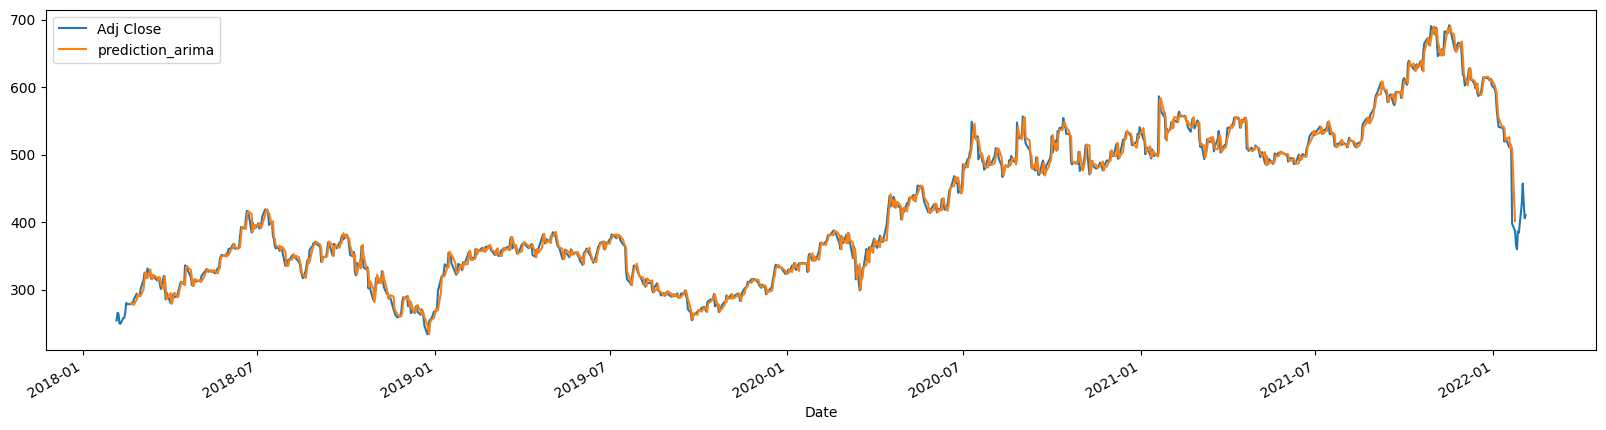

In [ ]:
df['prediction_arima']=result.predict(start=10,end=999)
df[["Adj Close","prediction_arima"]].plot(figsize=(20,5))

## Forecating Stock price prediction for next 30 days

In [ ]:
fc = result.forecast(30, alpha=0.05)
for i in fc:
    print(round(i,0))

409.0
400.0
393.0
392.0
396.0
398.0
398.0
400.0
406.0
411.0
412.0
407.0
404.0
403.0
402.0
398.0
394.0
395.0
399.0
403.0
404.0
405.0
407.0
409.0
408.0
404.0
400.0
399.0
399.0
399.0


In [ ]:
fc = [408.0, 408.0, 407.0, 405.0, 411.0, 409.0, 410.0, 407.0, 407.0, 410.0, 409.0, 411.0, 407.0, 408.0, 409.0, 409.0, 410.0, 407.0, 409.0, 409.0, 410.0, 410.0, 408.0, 409.0, 408.0, 410.0, 409.0, 408.0, 409.0, 409.0]

# Create a date range from '2022-02-05' to '2022-03-06'
start_date = '2022-02-05'
end_date = '2022-03-06'
date_range = pd.date_range(start=start_date, end=end_date)


fc_with_dates = pd.Series(fc, index=date_range)
print(fc_with_dates)

2022-02-05    408.0
2022-02-06    408.0
2022-02-07    407.0
2022-02-08    405.0
2022-02-09    411.0
2022-02-10    409.0
2022-02-11    410.0
2022-02-12    407.0
2022-02-13    407.0
2022-02-14    410.0
2022-02-15    409.0
2022-02-16    411.0
2022-02-17    407.0
2022-02-18    408.0
2022-02-19    409.0
2022-02-20    409.0
2022-02-21    410.0
2022-02-22    407.0
2022-02-23    409.0
2022-02-24    409.0
2022-02-25    410.0
2022-02-26    410.0
2022-02-27    408.0
2022-02-28    409.0
2022-03-01    408.0
2022-03-02    410.0
2022-03-03    409.0
2022-03-04    408.0
2022-03-05    409.0
2022-03-06    409.0
Freq: D, dtype: float64


## Plotting forecasted stocks predicted

<Axes: >

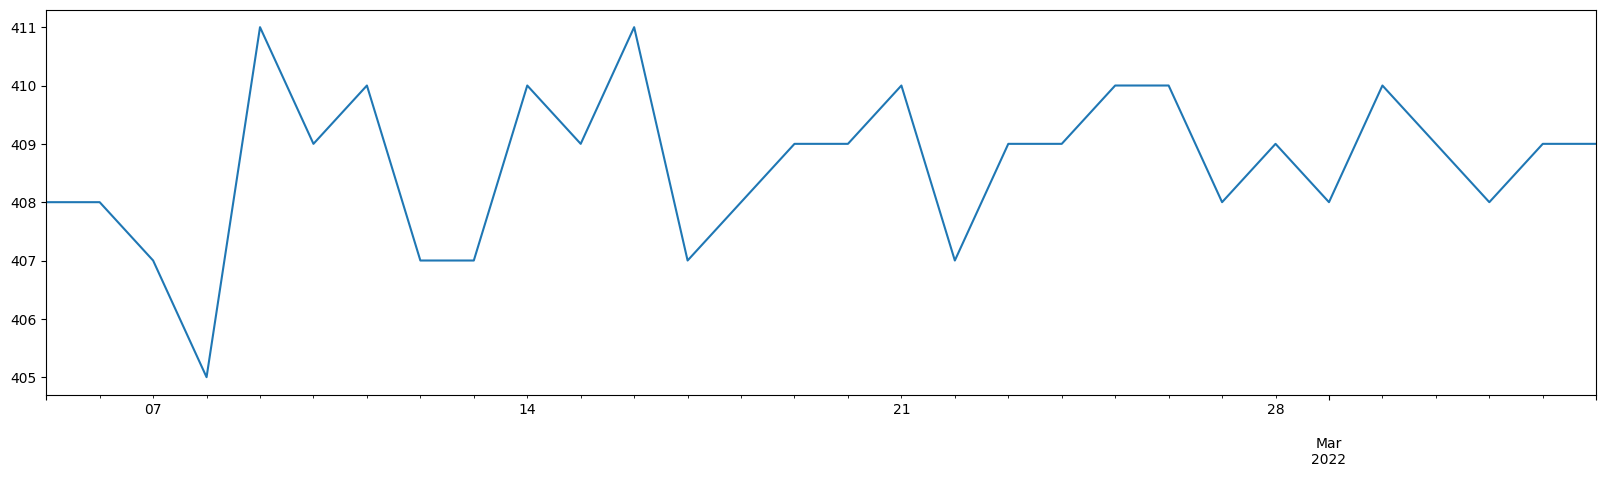

In [ ]:
fc_with_dates.plot(figsize=(20,5))

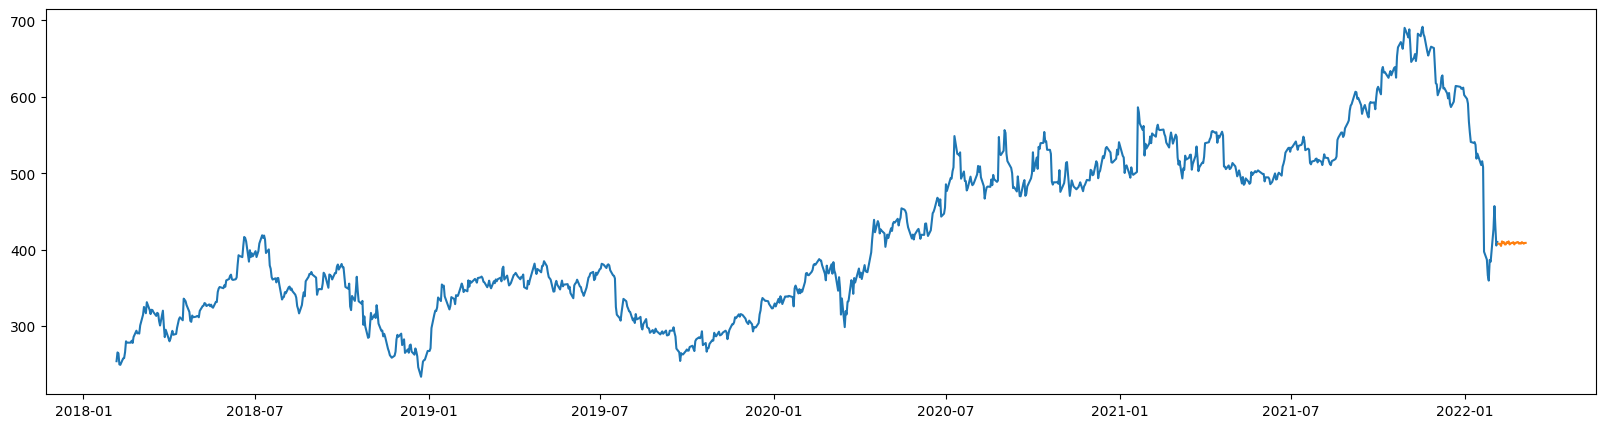

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(df["Adj Close"])
plt.plot(fc_with_dates)